<a href="https://colab.research.google.com/github/hipeoplea/Sai/blob/main/SAI_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("california_housing_train.csv")

print("Статистика по датасету")
df.describe()


Статистика по датасету


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


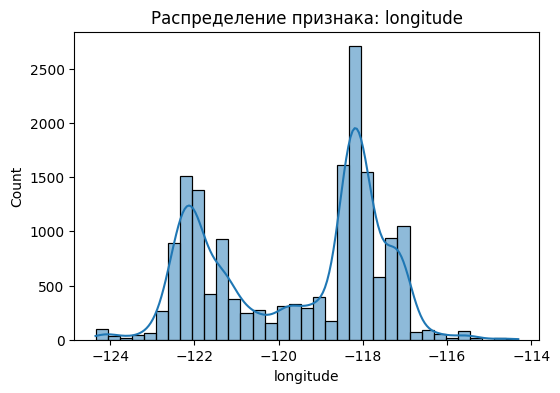

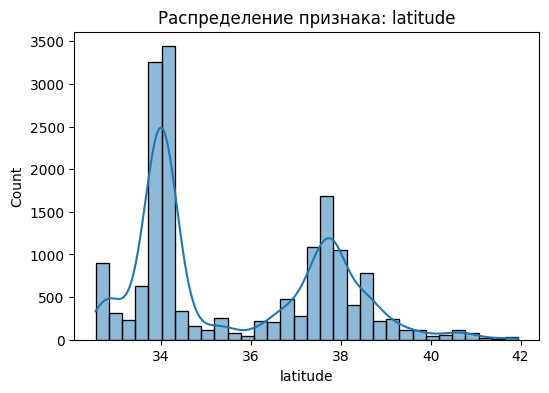

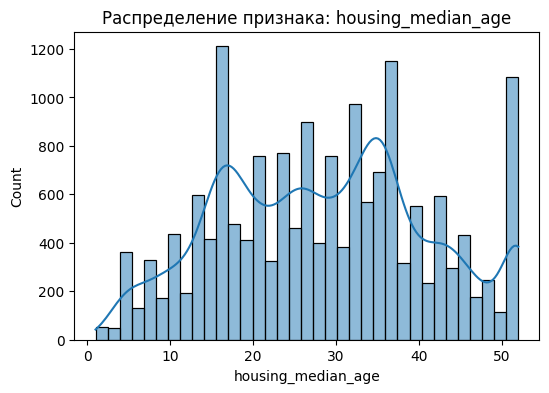

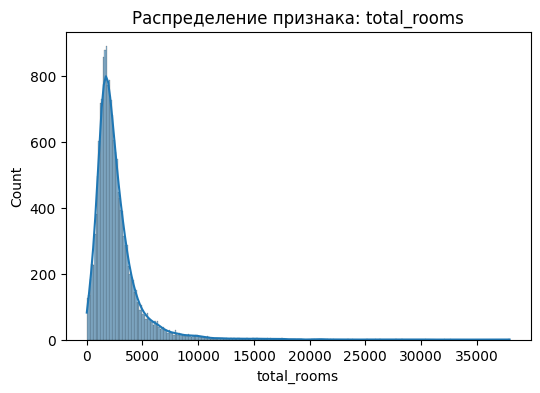

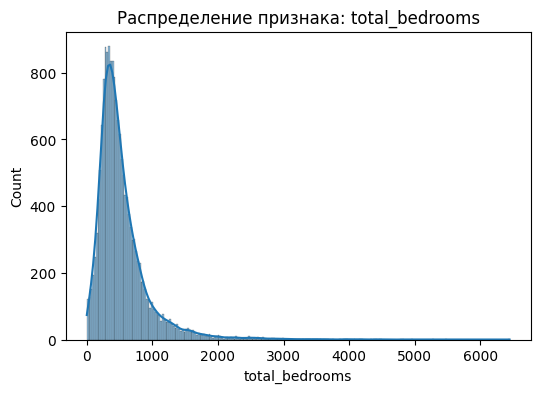

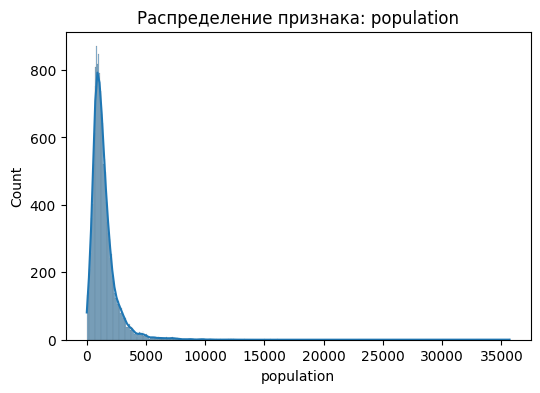

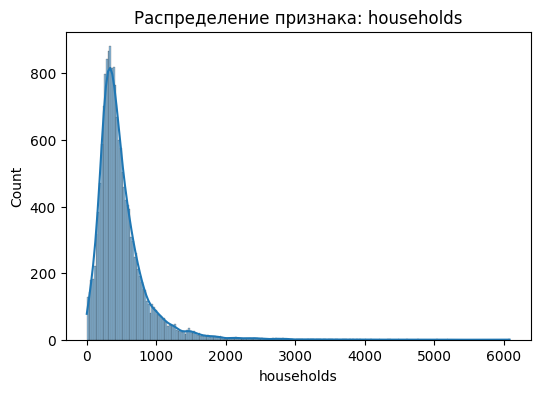

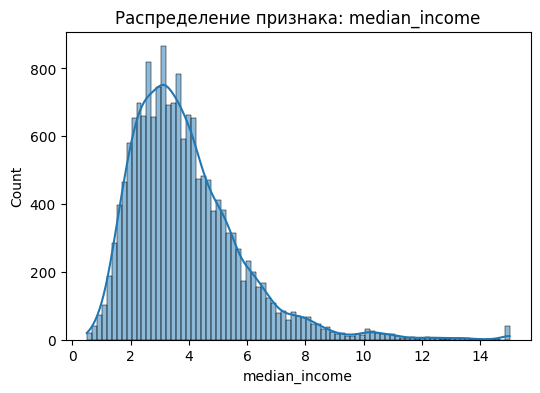

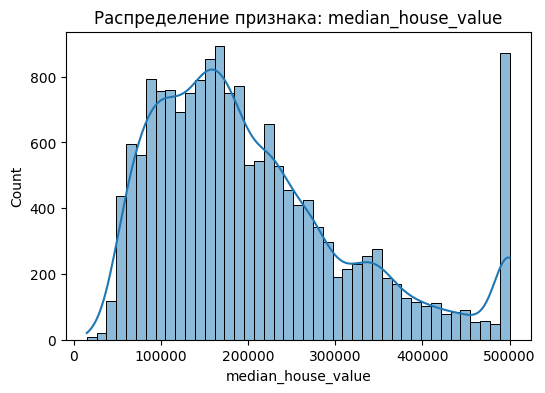

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Распределение признака: {col}")
    plt.show()


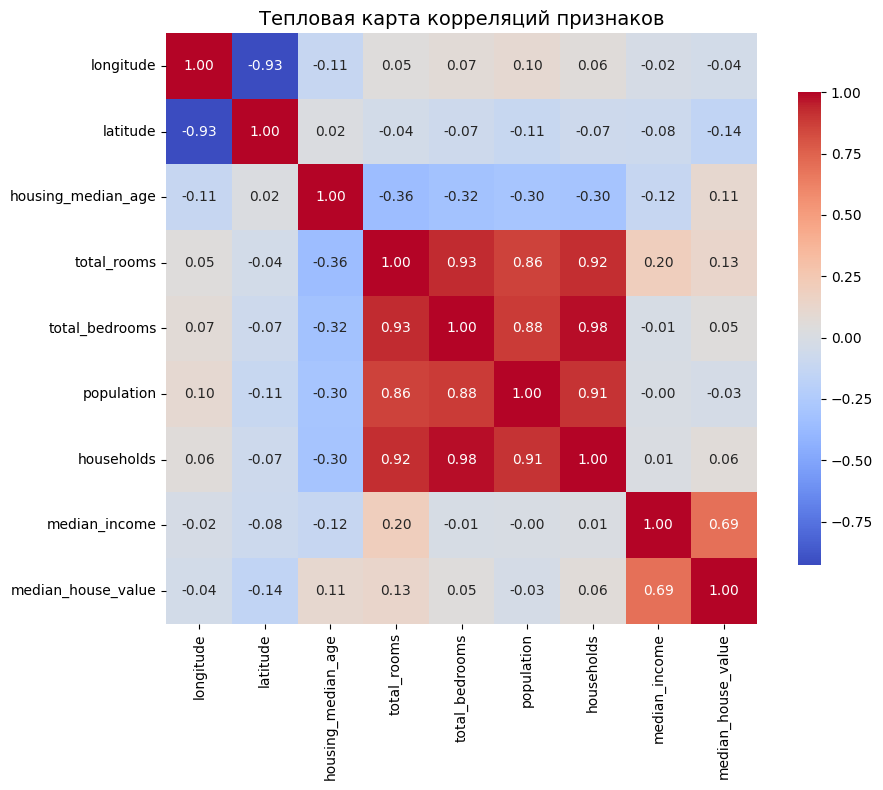

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    df.corr(numeric_only=True),
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    square=True,
    cbar_kws={"shrink": .8})
plt.title("Тепловая карта корреляций признаков", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
corr_with_target = df.corr(numeric_only=True)["median_house_value"].sort_values(ascending=False)
print(corr_with_target)


median_house_value    1.000000
median_income         0.691871
total_rooms           0.130991
housing_median_age    0.106758
households            0.061031
total_bedrooms        0.045783
population           -0.027850
longitude            -0.044982
latitude             -0.144917
Name: median_house_value, dtype: float64


In [ ]:
print("Пропуски по столбцам:")
print(df.isna().sum().sort_values(ascending=False))


Пропуски по столбцам:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


Заполняем пропуски средними значениями(для нашего датасета не обязательный шаг, но задание есть задание).

Выбираем Целевую переменную.

Нормализуем все остальные столбцы

$x' = \frac{x - x_{\min}}{x_{\max} - x_{\min}}$

In [ ]:
for col in df.columns:
    df.fillna({col: col}, inplace=True)

target_col = "median_house_value"
feature_cols = df.columns.drop(target_col)

for col in feature_cols:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,0.476882,0.327867,0.540968,0.069637,0.083552,0.039984,0.082260,0.233354,207300.912353
std,0.199718,0.227135,0.246803,0.057465,0.065410,0.032172,0.063233,0.131595,115983.764387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14999.000000
25%,0.254980,0.147715,0.333333,0.038487,0.045934,0.022058,0.046210,0.142514,119400.000000
50%,0.583665,0.181722,0.549020,0.056017,0.067194,0.032624,0.067094,0.209976,180400.000000
75%,0.632470,0.550478,0.705882,0.083017,0.100442,0.048152,0.099367,0.294279,265000.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,500001.000000


Разделяем на обучающую и тестовую выборки (было бы удобнее через train_test_split, но я так и не поняла можно ли sklearn юзать)

In [ ]:
np.random.seed(42)
msk = np.random.rand(len(df)) < 0.8
X_train = df.loc[msk, feature_cols].values
y_train = df.loc[msk, target_col].values
X_test = df.loc[~msk, feature_cols].values
y_test = df.loc[~msk, target_col].values

Класс `LinearRegressionCustom` реализует линейную регрессию методом наименьших квадратов.

Модель линейной регрессии описывается формулой:
$$
\hat{y} = Xw + b
$$
где  
\( X \) — матрица признаков,  
\( w \) — вектор коэффициентов (весов),  
\( b \) — свободный член (intercept).

Для нахождения оптимальных коэффициентов используется нормальное уравнение:
$$
\theta = (X^T X)^{-1} X^T y
$$
где $( \theta = [b, w_1, w_2, ..., w_n]^T $).

Метод `fit()`:
- добавляет единичный столбец к \(X\);
- вычисляет $(\theta);$
- сохраняет $(b = \theta_0)$ и $(w = \theta_1).$

Метод `predict()`:
$$
\hat{y} = Xw + b
$$

Метод `r2_score()` вычисляет коэффицент детерминации:
$$
R^2 = 1 - \frac{\sum (y_i - \hat{y_i})^2}{\sum (y_i - \bar{y})^2}
$$
где  
$(\sum (y_i - \hat{y_i})^2)$ — сумма квадратов ошибок $(SS\_{res}),  $

$(\sum (y_i - \bar{y})^2)$ — общая дисперсия $(SS\_{tot})$

Метод `rmse()` вычисляет среднеквадратичную ошибку:

$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$



In [ ]:
class LinearRegressionCustom:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        self.intercept_ = theta[0]
        self.coef_ = theta[1:]

    def predict(self, X):
        return X.dot(self.coef_) + self.intercept_

    def r2_score(self, y_true, y_pred):
        ss_total = np.sum((y_true - np.mean(y_true))**2)
        ss_res = np.sum((y_true - y_pred)**2)
        return 1 - ss_res/ss_total

    def rmse(self, y_true, y_pred):
        return np.sqrt(np.mean((y_true - y_pred)**2))

# Модель 1: все признаки


In [ ]:
X1_train, X1_test = X_train, X_test

# Модель 2: только географические признаки (longitude, latitude)


In [ ]:
X2_train, X2_test = X_train[:, :2], X_test[:, :2]

# Модель 3: добавляем синтетический признак (households/population)


In [ ]:
synthetic_train = (X_train[:, 5] / (X_train[:, 6]+1e-5)).reshape(-1,1)
synthetic_test = (X_test[:, 5] / (X_test[:, 6]+1e-5)).reshape(-1,1)
X3_train = np.hstack([X_train, synthetic_train])
X3_test = np.hstack([X_test, synthetic_test])

Модель 4: только median_income(поиграться)

In [ ]:
X4_train, X4_test = X_train[:, 7], X_test[:, 7]

# Функция для обучения и оценки


In [ ]:
def train_and_evaluate(X_tr, X_te, y_tr, y_te):
    model = LinearRegressionCustom()
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    score = model.r2_score(y_te, y_pred)
    rmse = model.rmse(y_te, y_pred)
    return model, score, rmse

In [ ]:
model1, r2_1, rmse1 = train_and_evaluate(X1_train, X1_test, y_train, y_test)
model2, r2_2, rmse2 = train_and_evaluate(X2_train, X2_test, y_train, y_test)
model3, r2_3, rmse3 = train_and_evaluate(X3_train, X3_test, y_train, y_test)
model4, r2_4, rmse4 = train_and_evaluate(X4_train.reshape(-1,1), X4_test.reshape(-1,1), y_train, y_test)

In [ ]:
print("R^2 для модели 1 (все признаки):", r2_1)
print("R^2 для модели 2 (только география):", r2_2)
print("R^2 для модели 3 (с синтетическим признаком):", r2_3)
print("R^2 для модели 4 (только median_income):", r2_4)

R^2 для модели 1 (все признаки): 0.6057634443439881
R^2 для модели 2 (только география): 0.23724865010668283
R^2 для модели 3 (с синтетическим признаком): 0.60478092502149
R^2 для модели 4 (только median_income): 0.46400218775755353


In [ ]:
print("RMSE для модели 1 (все признаки):", rmse1)
print("RMSE для модели 2 (только географические признаки):", rmse2)
print("RMSE для модели 3 (с синтетическим признаком):", rmse3)
print("RMSE для модели 4 (только median_income):", rmse4)

RMSE для модели 1 (все признаки): 72301.13149861353
RMSE для модели 2 (только географические признаки): 100567.61261921232
RMSE для модели 3 (с синтетическим признаком): 72391.17014785316
RMSE для модели 4 (только median_income): 84303.99521477506
